## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import time

## Importing Data

In [ ]:
path_to_file = tf.keras.utils.get_file('2554-0.txt', 'https://www.gutenberg.org/files/2554/2554-0.txt')

1212416/1201520 [==============================] - 0s 0us/step


In [ ]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

## Identifying Unique Characters

In [ ]:
vocab = sorted(set(text))

print('{} unique characters'.format(len(vocab)))
print('vocab:', vocab)

101 unique characters
vocab: ['\n', '\r', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'ä', 'æ', 'ç', 'è', 'é', 'ê', 'î', 'ï', 'ô', 'ö', 'ü', '‘', '’', '“', '”', '\ufeff']


## Assigning Unique IDs to all the character

In [ ]:
char2index = {char: index for index, char in enumerate(vocab)}

for char, _ in zip(char2index, range(len(vocab))):
    print('  {:4s}: {:3d}'.format(repr(char), char2index[char]))

  '\n':   0
  '\r':   1
  ' ' :   2
  '!' :   3
  '"' :   4
  '#' :   5
  '$' :   6
  '%' :   7
  "'" :   8
  '(' :   9
  ')' :  10
  '*' :  11
  ',' :  12
  '-' :  13
  '.' :  14
  '/' :  15
  '0' :  16
  '1' :  17
  '2' :  18
  '3' :  19
  '4' :  20
  '5' :  21
  '6' :  22
  '7' :  23
  '8' :  24
  '9' :  25
  ':' :  26
  ';' :  27
  '?' :  28
  'A' :  29
  'B' :  30
  'C' :  31
  'D' :  32
  'E' :  33
  'F' :  34
  'G' :  35
  'H' :  36
  'I' :  37
  'J' :  38
  'K' :  39
  'L' :  40
  'M' :  41
  'N' :  42
  'O' :  43
  'P' :  44
  'Q' :  45
  'R' :  46
  'S' :  47
  'T' :  48
  'U' :  49
  'V' :  50
  'W' :  51
  'X' :  52
  'Y' :  53
  'Z' :  54
  '[' :  55
  ']' :  56
  '_' :  57
  'a' :  58
  'b' :  59
  'c' :  60
  'd' :  61
  'e' :  62
  'f' :  63
  'g' :  64
  'h' :  65
  'i' :  66
  'j' :  67
  'k' :  68
  'l' :  69
  'm' :  70
  'n' :  71
  'o' :  72
  'p' :  73
  'q' :  74
  'r' :  75
  's' :  76
  't' :  77
  'u' :  78
  'v' :  79
  'w' :  80
  'x' :  81
  'y' :  82
  'z

In [ ]:
index2char = np.array(vocab)
print(index2char)

['\n' '\r' ' ' '!' '"' '#' '$' '%' "'" '(' ')' '*' ',' '-' '.' '/' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y'
 'Z' '[' ']' '_' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n'
 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'à' 'ä' 'æ' 'ç' 'è' 'é'
 'ê' 'î' 'ï' 'ô' 'ö' 'ü' '‘' '’' '“' '”' '\ufeff']


In [ ]:
text_as_int = np.array([char2index[char] for char in text])
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

'\ufeffThe Project Gu' --> array([100,  48,  65,  62,   2,  44,  75,  72,  67,  62,  60,  77,   2,
        35,  78])


## Setting Sequence Length

In [ ]:
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 11651


## Creating Training Dataset

In [ ]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

## Generating batched sequences

In [ ]:
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 11651

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the u'
'se of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with alm'
'ost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the P'
'roject Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not loc'
'ated in the United States, you\r\nwill have to check the laws of the country where you are located befo'


In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [ ]:
dataset = sequences.map(split_input_target)
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 11651


In [ ]:
for input_example, target_example in dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: '\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the '
Target: 'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the u'


In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE)

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

## LSTM Model

In [ ]:
def build_lstm_model(vocab_size, embedding_dim, rnn_units, batch_size):
    lstm_model = tf.keras.models.Sequential()

    lstm_model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    lstm_model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    lstm_model.add(tf.keras.layers.Dense(vocab_size))
  
    return lstm_model

In [ ]:
lstm_model = build_lstm_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           25856     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 101)           103525    
                                                                 
Total params: 5,376,357
Trainable params: 5,376,357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = lstm_model(input_example_batch)
    print(example_batch_predictions.shape)

(64, 100, 101)


In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lstm_model.compile(

 optimizer=adam_optimizer,
 loss=loss,
 metrics=['accuracy']
)

checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, monitor='accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

In [ ]:
EPOCHS = 50
history = lstm_model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/50
182/182 [==============================] - ETA: 0s - loss: 2.6057 - accuracy: 0.2857
Epoch 1: accuracy improved from -inf to 0.28570, saving model to tmp/checkpoints/ckpt_1
182/182 [==============================] - 35s 169ms/step - loss: 2.6057 - accuracy: 0.2857
Epoch 2/50
182/182 [==============================] - ETA: 0s - loss: 1.9531 - accuracy: 0.4317
Epoch 2: accuracy improved from 0.28570 to 0.43166, saving model to tmp/checkpoints/ckpt_2
182/182 [==============================] - 33s 171ms/step - loss: 1.9531 - accuracy: 0.4317
Epoch 3/50
182/182 [==============================] - ETA: 0s - loss: 1.6556 - accuracy: 0.5144
Epoch 3: accuracy improved from 0.43166 to 0.51439, saving model to tmp/checkpoints/ckpt_3
182/182 [==============================] - 33s 171ms/step - loss: 1.6556 - accuracy: 0.5144
Epoch 4/50
182/182 [==============================] - ETA: 0s - loss: 1.4900 - accuracy: 0.5585
Epoch 4: accuracy improved from 0.51439 to 0.55850, saving model to tm

In [ ]:
checkpoint_dir = 'tmp/checkpoints'
simplified_batch_size = 1

lstm_model = build_lstm_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

lstm_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

lstm_model.build(tf.TensorShape([simplified_batch_size, None]))

In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    start = time.time()
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)
    text_generated = []

    model.reset_states() 
    for char_index in range(num_generate):
        predictions = model(input_indices)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions,num_samples=1)[-1,0].numpy()
        input_indices = tf.expand_dims([predicted_id], 0)
        text_generated.append(index2char[predicted_id])
    end = time.time()

    global lstm_time
    lstm_time = end-start

    print(start_string + ''.join(text_generated))
    print('\nRun time:', lstm_time)

In [ ]:
print(generate_text(lstm_model, start_string=u'they'))

they) But their country, perhaps,
from consciousness what a strong, that since I know that on purpose whatever man whose curses, the murderer was truek, he angrily absents,
Raskolnikov wanted to ask you by being for sign the Yusupov high-fact I should fird
everything, and then he began quietly and eagerly quivering with
a burgais sincerely. It’s nothing but misery. She sent yet me with
your love, and mention for my own account! Talt--and uneasy aversion
here?” Raskolnikov fainting, all her chest!”

“No, Rodya, but he knows already on which he was firmly like peround, jumping up.”

“Excuse me, sir,” said Luzhin, affronted, and speaking to him up at once
shone her own floating it, he had often been
hiden in such as tried to ask you, what could be....
How truehintering a long coat
and a new black silk dress, so base even before
the old pawnbroker-woman. What do you mean be sure to come in great that had come. They will
don’t believe she’s not a pen, it’s unlike the morning,” L

Run time: 

## Basic RNN Model

In [ ]:
def build_rnn_model(vocab_size, embedding_dim, rnn_units, batch_size):
    rnn_model = tf.keras.models.Sequential()

    rnn_model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))


    rnn_model.add(tf.keras.layers.SimpleRNN( units=rnn_units,return_sequences=True, stateful=True,recurrent_initializer=tf.keras.initializers.GlorotNormal()))

    rnn_model.add(tf.keras.layers.Dense(vocab_size))
  
    return rnn_model

In [ ]:
rnn_model = build_rnn_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [ ]:
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (64, None, 256)           25856     
                                                                 
 simple_rnn (SimpleRNN)      (64, None, 1024)          1311744   
                                                                 
 dense_2 (Dense)             (64, None, 101)           103525    
                                                                 
Total params: 1,441,125
Trainable params: 1,441,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = rnn_model(input_example_batch)
    print(example_batch_predictions.shape)

(64, 100, 101)


In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rnn_model.compile(

 optimizer=adam_optimizer,
 loss=loss,
 metrics=['accuracy']
)

checkpoint_dir1 = 'tmp/checkpoints1'
os.makedirs(checkpoint_dir1, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir1, 'ckpt_{epoch}')

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, monitor='accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

In [ ]:
EPOCHS = 50
history1 = rnn_model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/50
182/182 [==============================] - ETA: 0s - loss: 2.5711 - accuracy: 0.2988
Epoch 1: accuracy improved from -inf to 0.29878, saving model to tmp/checkpoints1/ckpt_1
182/182 [==============================] - 29s 143ms/step - loss: 2.5711 - accuracy: 0.2988
Epoch 2/50
182/182 [==============================] - ETA: 0s - loss: 1.9522 - accuracy: 0.4371
Epoch 2: accuracy improved from 0.29878 to 0.43709, saving model to tmp/checkpoints1/ckpt_2
182/182 [==============================] - 27s 140ms/step - loss: 1.9522 - accuracy: 0.4371
Epoch 3/50
182/182 [==============================] - ETA: 0s - loss: 1.6875 - accuracy: 0.5074
Epoch 3: accuracy improved from 0.43709 to 0.50737, saving model to tmp/checkpoints1/ckpt_3
182/182 [==============================] - 27s 140ms/step - loss: 1.6875 - accuracy: 0.5074
Epoch 4/50
182/182 [==============================] - ETA: 0s - loss: 1.5458 - accuracy: 0.5448
Epoch 4: accuracy improved from 0.50737 to 0.54484, saving model to

In [ ]:
checkpoint_dir1 = 'tmp/checkpoints1'
simplified_batch_size = 1

rnn_model = build_rnn_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

rnn_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir1))

rnn_model.build(tf.TensorShape([simplified_batch_size, None]))

In [ ]:
def generate_text1(model, start_string, num_generate = 1000, temperature=1.0):
    start = time.time()
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)
    text_generated = []

    model.reset_states() 
    for char_index in range(num_generate):
        predictions = model(input_indices)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions,num_samples=1)[-1,0].numpy()
        input_indices = tf.expand_dims([predicted_id], 0)
        text_generated.append(index2char[predicted_id])
    end = time.time()
    global rnn_time
    rnn_time = end - start
    print(start_string + ''.join(text_generated))
    print('\nRun time:', rnn_time)

In [ ]:
print(generate_text1(rnn_model, start_string=u'they'))

they![*]6411554] You, Rodya,” she gets the literary
design,
sit down.” He tooked at him like a catch me! Principles.

“What? You
are.’ ‘That’s wherious projecter than he can be tears and chance.

“I look so. Yet indier, but ased?”

He screwed the Project
Gutenberg....”

He got up from sense.”

“Here we live
sitting question, as
he went touf. “Why, he thought he would have it for the big purling by Razumihin. “I
go on,” he cried
still
suddenly, “quite followed, but quite a rice and frightened.

“Honoured sir, or he answered it upon the landlady and timidly.

“Yes... I am not
asking about it. EBour me trial that
there are not a lound hesitating where Rodya
was
about the requiem
seven
histone, ot come tool them and had apparently coming constitutes
the daughter who passed through his mind, but don’t cheer Sonia mistakence and recovered, a half while he
always used to visit me,” Raskolnikov answered, Rodion Romanovitch. About
Katerina Ivanovna in any plahen to h

Run time: 9.07625675201416

## Transformers - GPT2 Model

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 4.9 MB/s 
     |████████████████████████████████| 596 kB 10.1 MB/s 
     |████████████████████████████████| 67 kB 3.4 MB/s 
     |████████████████████████████████| 6.5 MB 9.6 MB/s 
     |████████████████████████████████| 895 kB 49.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import TFGPT2LMHeadModel , GPT2Tokenizer
from tensorflow.python.saved_model.signature_def_utils_impl import predict_signature_def

In [ ]:
#get large GPT2 tokenizer and GPT2 model
tokenizer3 = GPT2Tokenizer.from_pretrained('gpt2-large')
#raw_input = tf.keras.Input(shape=(1,), dtype=tf.string)
 
model3 = TFGPT2LMHeadModel.from_pretrained('gpt2-large' ,pad_token_id = tokenizer3.eos_token_id)

#view model parameters
model3.summary()

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.88G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 774030080 
 r)                                                              
                                                                 
Total params: 774,030,080
Trainable params: 774,030,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#for reproducability
SEED = 34
#maximum number of words in output text
MAX_LEN = 50

prompt1 = 'scientist discovered a herd of unicorns living in a remote island spoke perfect English.'

input_ids = tokenizer3.encode(prompt1, return_tensors='tf')

In [ ]:
gpt_start = time.time()
sample_outputs = model3.generate(
                              input_ids,
                              do_sample = True, 
                              max_length = 2*MAX_LEN,#to test how long we can generate and it be coherent
                              #temperature = .7,
                              top_k = 50, 
                              top_p = 0.85, 
                              num_return_sequences = 1
)
#model3 = tf.keras.Model(raw_input, predictions)
print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}...".format(i, tokenizer3.decode(sample_output, skip_special_tokens = True)))
    print('')
gpt_end = time.time()
global gpt_time
gpt_time = gpt_end-gpt_start
print('\nRun time:', gpt_time)

Output:
----------------------------------------------------------------------------------------------------
0: scientist discovered a herd of unicorns living in a remote spoke perfect English.

But, it was just one of many bizarre tales that took place over the course of a recent three-year investigation into the nature of life on Earth, and the people who inhabit it.

The study, by Dr. Alan Cooper of the University of California, Riverside, the National Geographic Society, and the University of Florida, investigated the origin of the "unicorns" found in the Arizona desert....


Run time: 51.62245297431946


In [ ]:
print(sample_outputs)

tf.Tensor(
[[25346   396  5071   257 27638   286 28000 19942  2877   287   257  6569
   5158  2818  3594    13   198   198  1537    11   340   373   655   530
    286   867 13699 19490   326  1718  1295   625   262  1781   286   257
   2274  1115    12  1941  3645   656   262  3450   286  1204   319  3668
     11   290   262   661   508 14527   340    13   198   198   464  2050
     11   416  1583    13 12246 10382   286   262  2059   286  3442    11
  35597    11   262  2351 33636  7023    11   290   262  2059   286  4744
     11 12565   262  8159   286   262   366 46903 19942     1  1043   287
    262  7943 10326    13]], shape=(1, 100), dtype=int32)


## Comparing Speed of different models

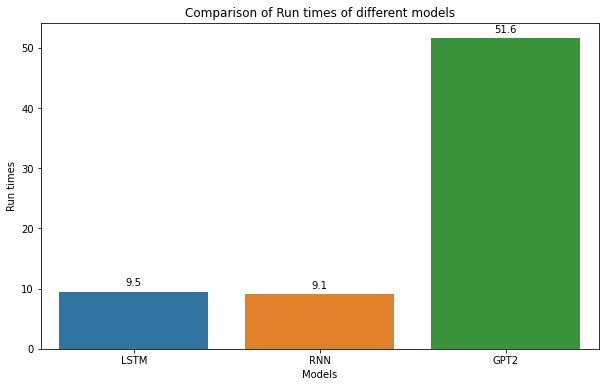

In [ ]:
time_data = {'LSTM': lstm_time, 'RNN':rnn_time, 'GPT2':gpt_time}

model_time = list(time_data.keys())
times = list(time_data.values())

fig = plt.figure(figsize = (10, 6))
splot = sns.barplot(x=model_time,y= times)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.xlabel("Models")
plt.ylabel("Run times")
plt.title("Comparison of Run times of different models")
plt.show()

## Comparison of performances of different models

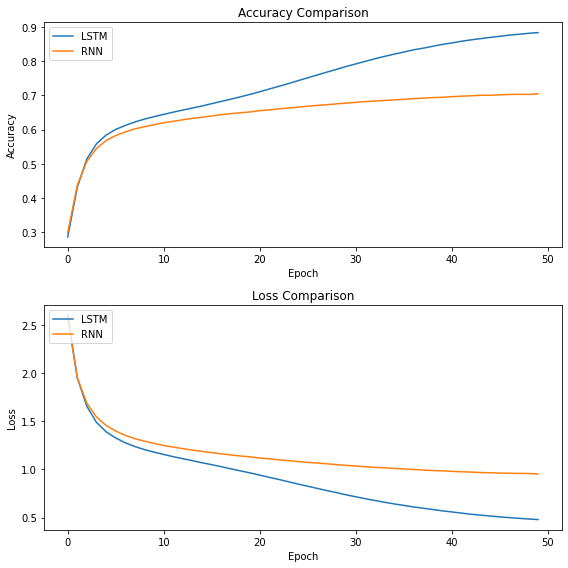

In [ ]:
plt.figure(figsize=(8, 8))

 
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'RNN'], loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'RNN'], loc='upper left')
plt.tight_layout()
plt.show()


## Comparison of Human Readability

![picture](https://drive.google.com/uc?id=1cEOzZg5xsAyhm3I0GFEJYHOamvdxYjke)

## Saving Model

In [ ]:
import os
import tempfile
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
Version = 1
dir = tempfile.gettempdir()

In [ ]:
export_path = os.path.join(dir,str(Version))

In [ ]:
tf.keras.models.save_model(
    model3,
    export_path,
    overwrite=True,
    include_optimizer=True,
)

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets


In [ ]:
print('\nSaved model:')
!ls -l {export_path}


Saved model:
total 12784
drwxr-xr-x 2 root root     4096 Mar 22 07:25 assets
-rw-r--r-- 1 root root   204830 Mar 22 07:26 keras_metadata.pb
-rw-r--r-- 1 root root 12869983 Mar 22 07:26 saved_model.pb
drwxr-xr-x 2 root root     4096 Mar 22 07:25 variables


## Examining the saved model

In [ ]:
#saved model detail
!saved_model_cli show --dir {export_path} --all 


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_ids'] tensor_info:
        dtype: DT_INT32
        shape: (-1, 5)
        name: serving_default_input_ids:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['logits'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 5, 50257)
        name: StatefulPartitionedCall:0
    outputs['past_key_values_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (2, -1, 20, 5, 64)
        name: StatefulPartitionedCall:1
    outputs['past_key_values_10

## Serving the model with TF serving

In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  41450      0 --:--:-- --:--:-- --:--:-- 40875
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server-universal amd64 Packages [349 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backp

## Install TF serving

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 69 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 5s (69.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


## Start running TF serving

In [ ]:
os.environ["dir"] = dir

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=gpt2_model \
  --model_base_path="${dir}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [ ]:
!tail server.log

## Make a request to your model in TF Serving

In [ ]:
prompt2 = 'hello What is the best thing in your life?'
input_ids1 = tokenizer3.encode(prompt2, return_tensors='tf')

In [ ]:
def gpt2_m(input_ids):
  input_ids = tokenizer3.encode(prompt2, return_tensors='tf')
  sample_outputs = model3.generate(
                              input_ids,
                              do_sample = True, 
                              max_length = 2*MAX_LEN,#to test how long we can generate and it be coherent
                              #temperature = .7,
                              top_k = 50, 
                              top_p = 0.85, 
                              num_return_sequences = 1
          )
#model3 = tf.keras.Model(raw_input, predictions)
  print("Output:\n" + 100 * '-')
  for i, sample_output in enumerate(sample_outputs):
    print("{}: {}...".format(i, tokenizer3.decode(sample_output, skip_special_tokens = True)))
    print('')


In [ ]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": input_ids1.numpy().tolist()})
print('Data: ',data)

Data:  {"signature_name": "serving_default", "instances": [[31373, 1867, 318, 262, 1266, 1517, 287, 534, 1204, 30]]}


## Make REST requests

In [ ]:
# docs_infra: no_execute
!pip install -q requests

In [ ]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/gpt2_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']
gpt2_m(predictions)

Output:
----------------------------------------------------------------------------------------------------
0: hello What is the best thing in your life?

The best thing is always getting a job you love and being able to support a family.

How do you feel about working in a job you hate?

It's really hard to find something that you love that isn't miserable.

What is your best advice for someone who wants to start a business?

Start small and always go for something different.

What is the first piece of advice you would give...

